In [64]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
import xarray
import cmocean
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import statsmodels.stats.multitest
import pyresample

In [456]:
data1 = xarray.open_dataset('data_atmos/data01_new3.nc')

In [5]:
data1 = xarray.open_dataset('data_atmos/data01.nc')
data5 = xarray.open_dataset('data_atmos3/data05.nc')
data15 = xarray.open_dataset('data_atmos3/data15.nc')

In [247]:
data5 = xarray.open_dataset('data_atmos3/data05.nc')
data15 = xarray.open_dataset('data_atmos3/data15.nc')

In [7]:
#data1 = xarray.open_dataset('data_atmos/data01.nc')
#data5 = xarray.open_dataset('data_atmos/data05.nc')
#data15 = xarray.open_dataset('data_atmos/data15.nc')

lon = numpy.load('data/lon.npy')
lat = numpy.load('data/lat.npy')

lat2 = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon2 = numpy.arange(0, 360, 0.75)

# Resample from reduced Gaussian grid to regular grid for plotting
orig_def = pyresample.geometry.SwathDefinition(lons=lon - 180, lats=lat)
targ_def = pyresample.geometry.SwathDefinition(lons=numpy.meshgrid(lon2, lat2)[0].flatten() - 180,
                                               lats=numpy.meshgrid(lon2, lat2)[1].flatten())

In [452]:
data1 = xarray.open_dataset('data_atmos/data01.nc')

In [457]:
data1['fdr_atmos_to_sst'] = (('cell', 'delay_sig'), numpy.full([88838, 73], numpy.NaN))
data1['fdr_sst_to_atmos'] = (('cell', 'delay_sig'), numpy.full([88838, 73], numpy.NaN))

for cell in range(1, 88839):
    data1['fdr_atmos_to_sst'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data1['sig_atmos_to_sst'][cell - 1, numpy.arange(0, 361, 5)],
                                                                                      alpha=0.1, method='fdr_bh')[0]
    data1['fdr_sst_to_atmos'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data1['sig_sst_to_atmos'][cell - 1, numpy.arange(0, 361, 5)],
                                                                                      alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [204]:
365/15

24.333333333333332

In [248]:
data5['fdr_atmos_to_sst'] = (('cell', 'delay_sig'), numpy.full([88838, 25], numpy.NaN))
data5['fdr_sst_to_atmos'] = (('cell', 'delay_sig'), numpy.full([88838, 25], numpy.NaN))

for cell in range(1, 88839):
    data5['fdr_atmos_to_sst'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data5['sig_atmos_to_sst'][cell - 1, numpy.arange(0, 73, 3)],
                                                                                      alpha=0.1, method='fdr_bh')[0]
    data5['fdr_sst_to_atmos'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data5['sig_sst_to_atmos'][cell - 1, numpy.arange(0, 73, 3)],
                                                                                      alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [249]:
data15['fdr_atmos_to_sst'] = (('cell', 'delay_sig'), numpy.full([88838, 25], numpy.NaN))
data15['fdr_sst_to_atmos'] = (('cell', 'delay_sig'), numpy.full([88838, 25], numpy.NaN))

for cell in range(1, 88839):
    data15['fdr_atmos_to_sst'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data15['sig_atmos_to_sst'][cell - 1, numpy.arange(0, 25)],
                                                                                       alpha=0.1, method='fdr_bh')[0]
    data15['fdr_sst_to_atmos'][cell - 1, :] = statsmodels.stats.multitest.multipletests(data15['sig_sst_to_atmos'][cell - 1, numpy.arange(0, 25)],
                                                                                       alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [95]:
data1 = xarray.open_dataset('data1p_atmos.nc')
data5 = xarray.open_dataset('data5p_atmos.nc')
data15 = xarray.open_dataset('data15p_atmos.nc')

In [450]:
data1.to_netcdf('data1p_atmos.nc')
data5.to_netcdf('data5p_atmos.nc')
data15.to_netcdf('data15p_atmos.nc')

In [485]:
persist_atmos_to_sst = numpy.full([88838], 0.0)
persist_sst_to_atmos = numpy.full([88838], 0.0)
for a in range(25):
    mask = (persist_atmos_to_sst >= 15*(a - 1)).astype(bool) & (data1['fdr_atmos_to_sst'][:, a].values != 0)
    persist_atmos_to_sst[mask] = (data1['fdr_atmos_to_sst'][:, a].values*15*a)[mask]
    
    mask = (persist_sst_to_atmos >= 15*(a - 1)).astype(bool) & (data1['fdr_sst_to_atmos'][:, a].values != 0)
    persist_sst_to_atmos[mask] = (data1['fdr_sst_to_atmos'][:, a].values*15*a)[mask]

persist_atmos_to_sst[(data1['fdr_atmos_to_sst'][:, 0] == 0) & (persist_atmos_to_sst == 0)] = numpy.NaN
persist_sst_to_atmos[(data1['fdr_sst_to_atmos'][:, 0] == 0) & (persist_sst_to_atmos == 0)] = numpy.NaN

In [213]:
persist5_atmos_to_sst = numpy.full([88838], 0.0)
persist5_sst_to_atmos = numpy.full([88838], 0.0)
for a in range(25):
    mask = (persist5_atmos_to_sst >= 15*(a - 1)).astype(bool) & (data5['fdr_atmos_to_sst'][:, a].values != 0)
    persist5_atmos_to_sst[mask] = (data5['fdr_atmos_to_sst'][:, a].values*15*a)[mask]
    
    mask = (persist5_sst_to_atmos >= 15*(a - 1)).astype(bool) & (data5['fdr_sst_to_atmos'][:, a].values != 0)
    persist5_sst_to_atmos[mask] = (data5['fdr_sst_to_atmos'][:, a].values*15*a)[mask]

persist5_atmos_to_sst[(data5['fdr_atmos_to_sst'][:, 0] == 0) & (persist5_atmos_to_sst == 0)] = numpy.NaN
persist5_sst_to_atmos[(data5['fdr_sst_to_atmos'][:, 0] == 0) & (persist5_sst_to_atmos == 0)] = numpy.NaN

In [252]:
persist15_atmos_to_sst = numpy.full([88838], 0.0)
persist15_sst_to_atmos = numpy.full([88838], 0.0)
for a in range(25):
    mask = (persist15_atmos_to_sst >= 15*(a - 1)).astype(bool) & (data15['fdr_atmos_to_sst'][:, a].values != 0)
    persist15_atmos_to_sst[mask] = (data15['fdr_atmos_to_sst'][:, a].values*15*a)[mask]
    
    mask = (persist15_sst_to_atmos >= 15*(a - 1)).astype(bool) & (data15['fdr_sst_to_atmos'][:, a].values != 0)
    persist15_sst_to_atmos[mask] = (data15['fdr_sst_to_atmos'][:, a].values*15*a)[mask]

persist15_atmos_to_sst[(data15['fdr_atmos_to_sst'][:, 0] == 0) & (persist15_atmos_to_sst == 0)] = numpy.NaN
persist15_sst_to_atmos[(data15['fdr_sst_to_atmos'][:, 0] == 0) & (persist15_sst_to_atmos == 0)] = numpy.NaN

In [191]:
15*25

375

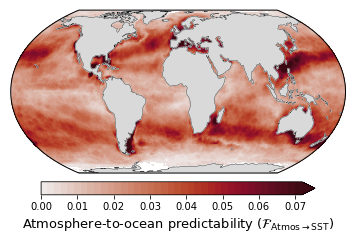

In [216]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data1['F_atmos_to_sst'][:, 0]
var[(data1['sig_atmos_to_sst'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_atmos_to_sst.pdf')

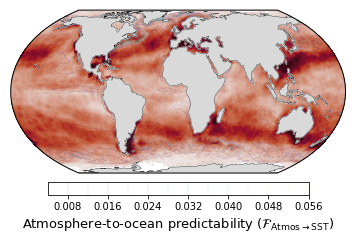

In [519]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data1['F_atmos_to_sst'][:, 0]
var[(data1['sig_atmos_to_sst'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')

lat2 = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon2 = numpy.arange(0, 360, 0.75)
regridded, lon_cyc = add_cyclic_point(numpy.flipud(grad), coord=lon2)
plt.contour(lon_cyc, lat2, regridded, 15, transform=ccrs.PlateCarree(), linewidths=0.1)
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('with_grad.pdf')

In [513]:
grad = numpy.fromfile('grad.dat').reshape([241, 480])

In [522]:
sst = numpy.fromfile('sst2.dat').reshape([241, 480])

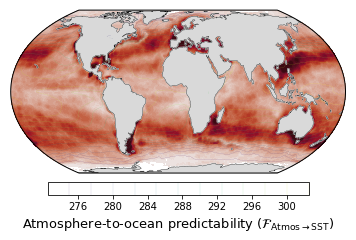

In [523]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data1['F_atmos_to_sst'][:, 0]
var[(data1['sig_atmos_to_sst'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')

lat2 = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon2 = numpy.arange(0, 360, 0.75)
regridded, lon_cyc = add_cyclic_point(sst, coord=lon2)
plt.contour(lon_cyc, lat2, regridded, 15, transform=ccrs.PlateCarree(), linewidths=0.1)
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('with_sst.pdf')

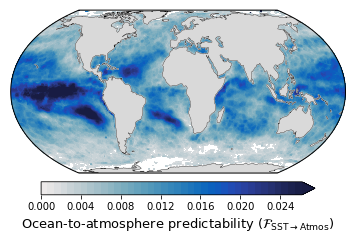

In [217]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data1['F_sst_to_atmos'][:, 0]
var[data1['sig_sst_to_atmos'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Ocean-to-atmosphere predictability ($\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Atmos}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_sst_to_atmos.pdf')

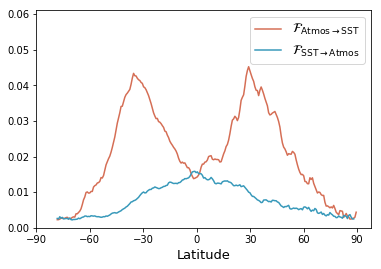

In [259]:
pts = []
pts2 = []
atmos_to_sst = data1['F_atmos_to_sst'][:, 0].load()
sst_to_atmos = data1['F_sst_to_atmos'][:, 0].load()

for l in numpy.unique(lat):
    pts.append((atmos_to_sst[(data1['sig_atmos_to_sst'][:, 0] < 0.05) & (lat == l)]).median().values)
    pts2.append((sst_to_atmos[(data1['sig_sst_to_atmos'][:, 0] < 0.05) & (lat == l)]).median().values)
plt.plot(numpy.unique(lat), pts, '#D56E55')
plt.plot(numpy.unique(lat), pts2, '#3899BA')
plt.xlabel('Latitude', size=13)
plt.xticks(numpy.linspace(-90, 90, 7))
plt.ylim([0, 0.061])
plt.legend([r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$', r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$'], fontsize=13)
plt.savefig('zonal_average_atmos.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


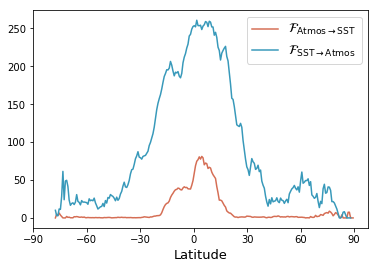

In [525]:
pts = []
pts2 = []
atmos_to_sst = persist_atmos_to_sst 
sst_to_atmos = persist_sst_to_atmos

for l in numpy.unique(lat):
    pts.append(numpy.nanmean(atmos_to_sst[(lat == l)]))
    pts2.append(numpy.nanmean(sst_to_atmos[(lat == l)]))
plt.plot(numpy.unique(lat), pts, '#D56E55')
plt.plot(numpy.unique(lat), pts2, '#3899BA')
plt.xlabel('Latitude', size=13)
plt.xticks(numpy.linspace(-90, 90, 7))
#plt.ylim([0, 50])
plt.legend([r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$', r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$'], fontsize=13)

In [493]:
list(zip(numpy.unique(lat), pts2))

[(-89.46282156857743, nan),
 (-88.7669513528425, nan),
 (-88.06697164743063, nan),
 (-87.36606343308205, nan),
 (-86.66480301344076, nan),
 (-85.96337216088044, nan),
 (-85.26184606071259, nan),
 (-84.56026138305344, nan),
 (-83.85863812860755, nan),
 (-83.15698812854168, nan),
 (-82.45531882716378, nan),
 (-81.7536351418384, nan),
 (-81.05194045093637, nan),
 (-80.35023715203569, nan),
 (-79.64852699366627, nan),
 (-78.94681128096673, nan),
 (-78.24509100782122, nan),
 (-77.54336694440903, 0.0),
 (-76.8416396967821, 0.0),
 (-76.13990974836805, 0.0),
 (-75.43817748948786, 0.0),
 (-74.73644323873921, 0.0),
 (-74.03470725874676, 15.0),
 (-73.33296976793656, 15.0),
 (-72.63123094945887, 15.0),
 (-71.92949095803333, 30.0),
 (-71.22774992525983, 45.0),
 (-70.5260079637821, 30.0),
 (-69.82426517058262, 15.0),
 (-69.12252162961363, 15.0),
 (-68.4207774139149, 15.0),
 (-67.71903258733155, 15.0),
 (-67.01728720591738, 15.0),
 (-66.31554131908858, 15.0),
 (-65.61379497057875, 30.0),
 (-64.912048

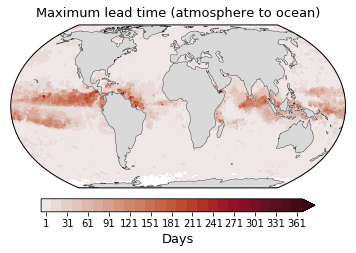

In [461]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth(central_longitude=0))
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist_atmos_to_sst.astype(float) + 1
var[data1['sig_atmos_to_sst'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 1

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 1)
plt.title('Maximum lead time (atmosphere to ocean)', size=13, pad=8)
cb.set_label(r'Days', size=13)
plt.savefig('time_atmos_to_sst.pdf')

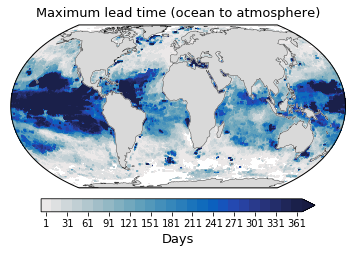

In [460]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)
levels = numpy.arange(-2.5, 35, 5)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist_sst_to_atmos.astype(float) + 1
var[data1['sig_sst_to_atmos'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 360#var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 1

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 1)
plt.title('Maximum lead time (ocean to atmosphere)', size=13, pad=8)
cb.set_label(r'Days', size=13)
#plt.savefig('time_sst_to_atmos.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


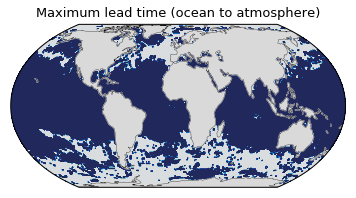

In [506]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)
levels = numpy.arange(-2.5, 35, 5)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = (persist_sst_to_atmos.astype(float) + 1 > 30).astype(float)
var[data1['sig_sst_to_atmos'][:, 0] > 0.05] = 0
var = numpy.ma.masked_invalid(var)
#vmin, vmax = 0, 1#var.max()
#levels = numpy.arange(-15/2, vmax + 15, 15) + 1

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, #vmin=min(levels), vmax=max(levels),
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')

gl = ax.gridlines(crs=ccrs.EqualEarth(), draw_labels=False,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

#cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 1)
plt.title('Maximum lead time (ocean to atmosphere)', size=13, pad=8)
cb.set_label(r'Days', size=13)
#plt.savefig('time_sst_to_atmos.pdf')

In [497]:
numpy.arange(-15/2, 360 + 15, 15) + 1

array([ -6.5,   8.5,  23.5,  38.5,  53.5,  68.5,  83.5,  98.5, 113.5,
       128.5, 143.5, 158.5, 173.5, 188.5, 203.5, 218.5, 233.5, 248.5,
       263.5, 278.5, 293.5, 308.5, 323.5, 338.5, 353.5, 368.5])

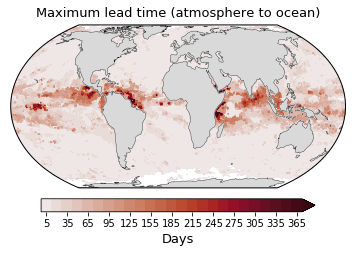

In [257]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist5_atmos_to_sst.astype(float)
var[data5['sig_atmos_to_sst'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 5

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 5)
plt.title('Maximum lead time (atmosphere to ocean)', size=13, pad=8)
cb.set_label(r'Days', size=13)
plt.savefig('time5_atmos_to_sst.pdf')

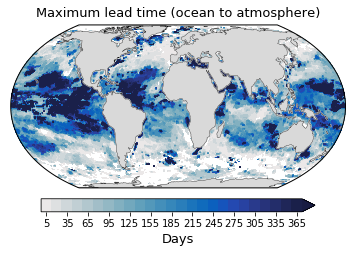

In [258]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist5_sst_to_atmos.astype(float) + 5
var[data5['sig_sst_to_atmos'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 360#var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 5

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 5)
plt.title('Maximum lead time (ocean to atmosphere)', size=13, pad=8)
cb.set_label(r'Days', size=13)
plt.savefig('time5_sst_to_atmos.pdf')

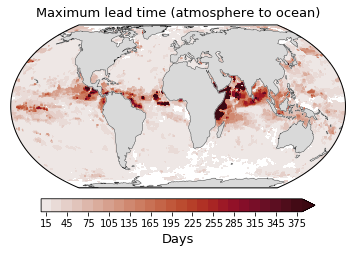

In [235]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist15_atmos_to_sst.astype(float) + 15
var[data15['sig_atmos_to_sst'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 360#var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 15

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 15)
cb.extend = 'neither'
plt.title('Maximum lead time (atmosphere to ocean)', size=13, pad=8)
cb.set_label(r'Days', size=13)
plt.savefig('time15_atmos_to_sst.pdf')

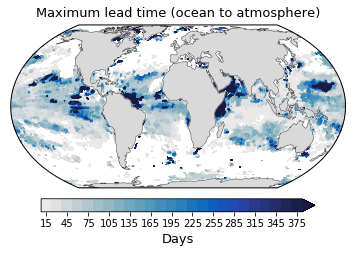

In [234]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = persist15_sst_to_atmos.astype(float) + 15
var[data15['sig_sst_to_atmos'][:, 0] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 15, 360#var.max()
levels = numpy.arange(-15/2, vmax + 15, 15) + 15

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.05, ticks=numpy.arange(0, vmax + 30, 30) + 15)
plt.title('Maximum lead time (ocean to atmosphere)', size=13, pad=8)
cb.set_label(r'Days', size=13)
plt.savefig('time15_sst_to_atmos.pdf')

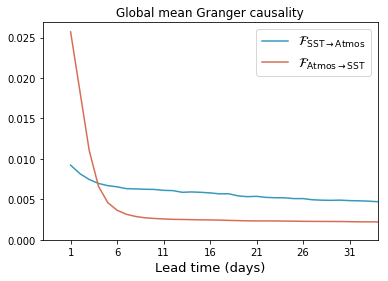

In [428]:
# Decay of predictability with time
plt.plot(range(1, 36), (data1['F_sst_to_atmos'].mean(axis=0)[:35]), '#3899BA')
plt.plot(range(1, 36), (data1['F_atmos_to_sst'].mean(axis=0)[:35]), '#D56E55')
plt.legend([r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$',
            r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}$'], fontsize=13)
plt.title('Global mean Granger causality')
plt.xlabel('Lead time (days)', size=13)
plt.xlim([-2, 34])
plt.ylim([0, None])
plt.xticks(range(1, 36, 5))

plt.savefig('predictability_decay_atmos.pdf')

([<matplotlib.axis.XTick at 0x7f94f1cc93c8>,
 <a list of 7 Text xticklabel objects>)

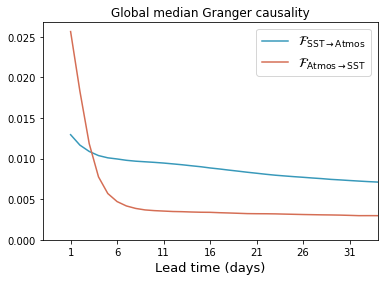

In [430]:
# Decay of predictability with time
plt.plot(range(1, 36), (data1['F_sst_to_atmos'][(lat < 30) & (lat > -30)].mean(axis=0)[:35]), '#3899BA')
plt.plot(range(1, 36), (data1['F_atmos_to_sst'][(lat < 30) & (lat > -30)].mean(axis=0)[:35]), '#D56E55')
plt.legend([r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$',
            r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}$'], fontsize=13)
plt.title('Global median Granger causality')
plt.xlabel('Lead time (days)', size=13)
plt.xlim([-2, 34])
plt.ylim([0, None])
plt.xticks(range(1, 36, 5))

([<matplotlib.axis.XTick at 0x7f94f1b98198>,
 <a list of 7 Text xticklabel objects>)

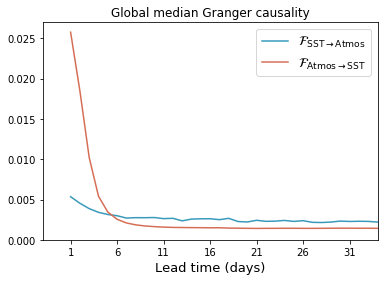

In [431]:
# Decay of predictability with time
plt.plot(range(1, 36), (data1['F_sst_to_atmos'][~((lat < 30) & (lat > -30))].mean(axis=0)[:35]), '#3899BA')
plt.plot(range(1, 36), (data1['F_atmos_to_sst'][~((lat < 30) & (lat > -30))].mean(axis=0)[:35]), '#D56E55')
plt.legend([r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$',
            r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}$'], fontsize=13)
plt.title('Global median Granger causality')
plt.xlabel('Lead time (days)', size=13)
plt.xlim([-2, 34])
plt.ylim([0, None])
plt.xticks(range(1, 36, 5))

In [416]:
data1['F_sst_to_atmos'].median(axis=0)[:61] - data1['F_atmos_to_sst'].median(axis=0)[:61]

<xarray.DataArray (delay: 61)>
array([-0.014808, -0.00981 , -0.004643, -0.00088 ,  0.000879,  0.00174 ,
        0.002136,  0.002322,  0.002416,  0.00246 ,  0.002442,  0.002387,
        0.00234 ,  0.00232 ,  0.002277,  0.002192,  0.002134,  0.002121,
        0.002038,  0.001997,  0.001965,  0.001917,  0.001855,  0.001858,
        0.001809,  0.001793,  0.00177 ,  0.001781,  0.001754,  0.001711,
        0.001697,  0.00168 ,  0.001622,  0.001596,  0.001555,  0.001526,
        0.001488,  0.001477,  0.001445,  0.001424,  0.001395,  0.001347,
        0.001328,  0.001278,  0.001224,  0.001194,  0.001177,  0.001149,
        0.001103,  0.001081,  0.001085,  0.00107 ,  0.001057,  0.001049,
        0.001024,  0.001018,  0.001017,  0.001012,  0.00101 ,  0.001017,
        0.001009])
Coordinates:
  * delay    (delay) int64 0 1 2 3 4 5 6 7 8 9 ... 51 52 53 54 55 56 57 58 59 60

In [218]:
0.016/numpy.e

0.005886071058743078

(0, 0.06194607989424129)

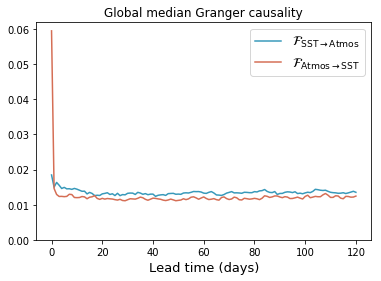

In [199]:
# Decay of predictability with time
plt.plot((data15['F_sst_to_atmos'][~((lat < 30) & (lat > -30))].median(axis=0)), '#3899BA')
plt.plot((data15['F_atmos_to_sst'][~((lat < 30) & (lat > -30))].median(axis=0)), '#D56E55')
plt.legend([r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$',
            r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}$'], fontsize=13)
plt.title('Global median Granger causality')
plt.xlabel('Lead time (days)', size=13)
#plt.xlim([-2, 60])
plt.ylim([0, None])
#plt.xticks(range(1, 70, 10))

([<matplotlib.axis.XTick at 0x7f63985f8eb8>,
 <a list of 8 Text xticklabel objects>)

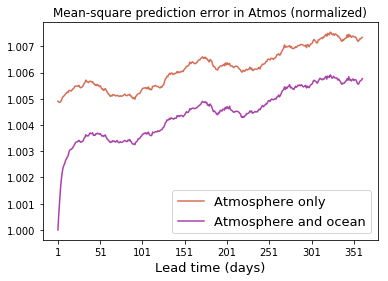

In [469]:
# MSPE increase
mspe_reduced = data1['mspe_reduced_sst_to_atmos']
mspe_full = data1['mspe_full_sst_to_atmos']

plt.plot(range(1, 362), (mspe_reduced/mspe_full[:, 0])[((lat > 30) | (lat < -30))].median(axis=0), '#D56E55')
plt.plot(range(1, 362), (mspe_full/mspe_full[:, 0])[((lat > 30) | (lat < -30))].median(axis=0), '#A942A9')
plt.legend(['Atmosphere only', 'Atmosphere and ocean'], fontsize=13)
plt.title('Mean-square prediction error in Atmos (normalized)')
plt.xlabel('Lead time (days)', size=13)
plt.xticks(range(1, 352, 50))

#plt.savefig('mspe_sst_to_atmos.pdf')

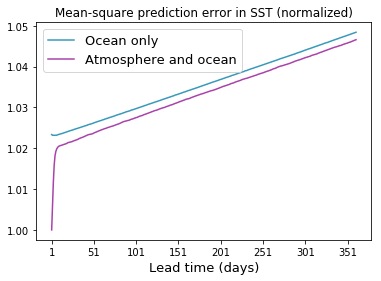

In [298]:
mspe_reduced = data1['mspe_reduced_atmos_to_sst']
mspe_full = data1['mspe_full_atmos_to_sst']

plt.plot(range(1, 362), (mspe_reduced/mspe_full[:, 0]).median(axis=0), '#3899BA')
plt.plot(range(1, 362), (mspe_full/mspe_full[:, 0]).median(axis=0), '#A942A9')
plt.legend(['Ocean only', 'Atmosphere and ocean'], fontsize=13)
plt.title('Mean-square prediction error in SST (normalized)')
plt.xlabel('Lead time (days)', size=13)
plt.xticks(range(1, 352, 50))

plt.savefig('mspe_atmos_to_sst.pdf')

In [41]:
# Boreal summer
mspe_sst = numpy.hstack([data_summer['mspe_sst_to_vort'][lat > 0], data_winter['mspe_sst_to_vort'][lat < 0]])
numpy.nanmean(mspe_sst)

3.0421322914370821e-10

In [42]:
# Boreal winter
mspe_sst = numpy.hstack([data_summer['mspe_sst_to_vort'][lat < 0], data_winter['mspe_sst_to_vort'][lat > 0]])
numpy.nanmean(mspe_sst)

4.0286699120731866e-10

In [43]:
mspe_summer = numpy.exp(-(data_summer['F_sst_to_vort'] - numpy.log(data_summer['mspe_sst_to_vort'])))
mspe_winter = numpy.exp(-(data_winter['F_sst_to_vort'] - numpy.log(data_winter['mspe_sst_to_vort'])))

In [44]:
# Boreal summer
mspe_sst = numpy.hstack([mspe_summer[lat > 0], mspe_winter[lat < 0]])
numpy.nanmean(mspe_sst)

3.0326533818617133e-10

In [45]:
# Boreal winter 
mspe_sst = numpy.hstack([mspe_winter[lat > 0], mspe_summer[lat < 0]])
numpy.nanmean(mspe_sst)

4.0216990296829605e-10

In [39]:
0.046129322815650124 - 0.04572895360630317

0.0004003692093469541

In [462]:
0.021938785034931983 - 0.021855043898393649

8.374113653833448e-05

In [120]:
pts = []
for l in numpy.unique(lat):
    pts.append((data1['mspe_sst_to_vort']/mspe_vort[:, 0])[lat == l].mean(axis=0))

pts = numpy.array(pts)

-89.4628215686 -67.7190325873


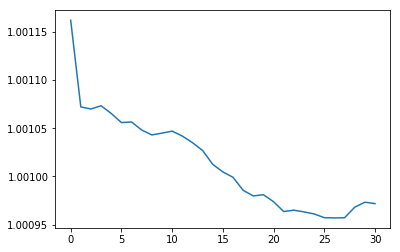

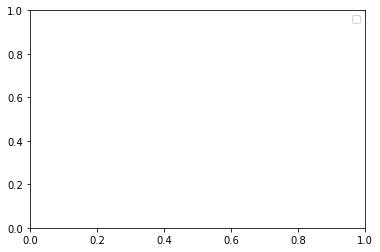

In [129]:
for i, l in enumerate(numpy.nanmean(pts.reshape([1, 256//1, 31]), axis=1)):
    ran = numpy.unique(lat).reshape([8, 256//8])[i]
    print(ran[0], ran[-1])
    plt.plot(l)
    plt.show()
plt.legend(numpy.linspace(-90, 90, 8))

/homes/ebach/miniconda3/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


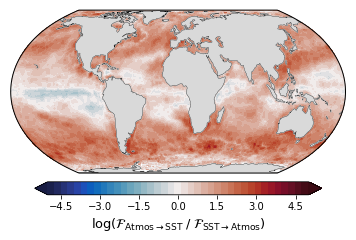

In [459]:
plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(data1['F_atmos_to_sst'][:, 0]/data1['F_sst_to_atmos'][:, 0])
#ratio[(data1['sig_atmos_to_sst'][:, 0] > 0.05) & (data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\log\left(\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}\;/\;\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}\right)$', size=13)

plt.savefig('driver.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


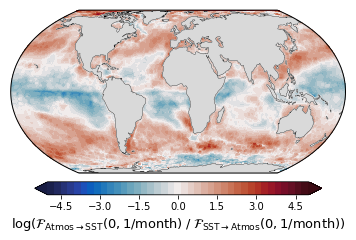

In [458]:
plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(numpy.trapz(spectral['f_atmos_to_sst'][:, :21], freqs[:21], axis=1)/numpy.trapz(spectral['f_sst_to_atmos'][:, :21], freqs[:21], axis=1))
#ratio[(data1['sig_atmos_to_sst'][:, 0] > 0.05) & (data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\log\left(\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}(0, 1/\mathrm{month})\;/\;\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}(0, 1/\mathrm{month})\right)$', size=13)
plt.savefig('driver_lowfreq.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


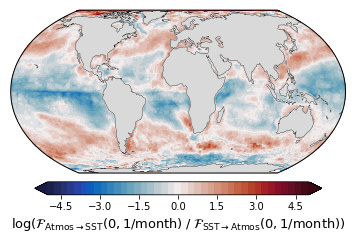

In [460]:
plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(numpy.trapz(spectral['f_atmos_to_sst'][:, :11], freqs[:11], axis=1)/numpy.trapz(spectral['f_sst_to_atmos'][:, :11], freqs[:11], axis=1))
#ratio[(data1['sig_atmos_to_sst'][:, 0] > 0.05) & (data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\log\left(\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}(0, 1/\mathrm{month})\;/\;\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}(0, 1/\mathrm{month})\right)$', size=13)


In [452]:
plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(numpy.trapz(spectral['f_atmos_to_sst'][:, :21], freqs[:21], axis=1)/numpy.trapz(spectral['f_sst_to_atmos'][:, :21], freqs[:21], axis=1))
#ratio[(data1['sig_atmos_to_sst'][:, 0] > 0.05) & (data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\log\left(\mathcal{F}_{\mathrm{Atmos}\rightarrow \mathrm{SST}}(0, 1/\mathrm{month})\;/\;\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}(0, 1/\mathrm{month})\right)$', size=13)
plt.savefig('driver_lowfreq.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(array([120]),)

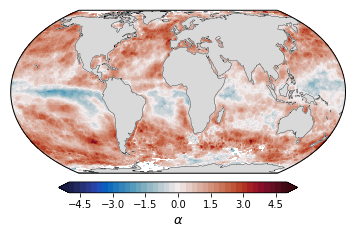

In [436]:
plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(data15['F_atmos_to_sst'][:, 0]/data15['F_sst_to_atmos'][:, 0])
ratio[(data15['sig_atmos_to_sst'][:, 0] > 0.05) & (data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\alpha$', size=13)
#plt.savefig('map_comparison_ratio_atmos.pdf')

In [343]:
data_winter = xarray.open_dataset('data_atmos/data_winter3.nc')
data_spring = xarray.open_dataset('data_atmos/data_spring3.nc')
data_summer = xarray.open_dataset('data_atmos/data_summer3.nc')
data_fall = xarray.open_dataset('data_atmos/data_fall3.nc')

In [474]:
data_winter.close()

In [344]:
var_summer = data_summer['F_atmos_to_sst'].copy()
var_summer[data_summer['sig_atmos_to_sst'] > 0.05] = numpy.NaN
var_summer = numpy.ma.masked_invalid(var)

regridded_summer = pyresample.kd_tree.resample_nearest(orig_def, var_summer.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

var_winter = data_winter['F_atmos_to_sst'].copy()
var_winter[data_winter['sig_atmos_to_sst'] > 0.05] = numpy.NaN
var_winter = numpy.ma.masked_invalid(var)

regridded_winter = pyresample.kd_tree.resample_nearest(orig_def, var_winter.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

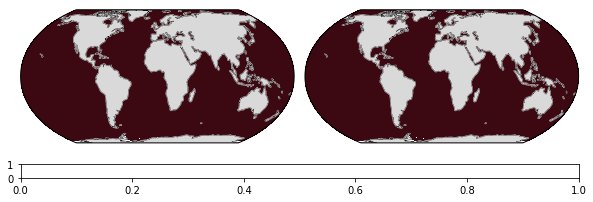

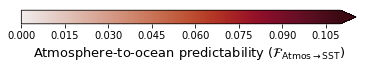

In [360]:
fig = plt.figure(figsize=(6, 0.25))
ax1 = plt.gca()
cmap = cmocean.cm.amp
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.11)
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm,
                                       orientation='horizontal', extend='max')
cb1.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb1.locator = tick_locator
cb1.update_ticks()

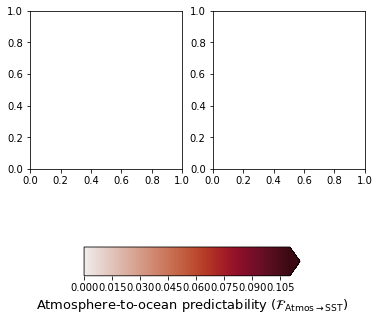

In [379]:
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 1],
                       height_ratios=[4, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

fig = plt.gcf()
ax3 = fig.add_axes([0.25, -0.04, 0.5, 0.1])
#ax3 = plt.subplot(gs[1, 0:2])

cmap = cmocean.cm.amp
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.11)
cb1 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm,
                                       orientation='horizontal', extend='max')
cb1.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb1.locator = tick_locator
cb1.update_ticks()

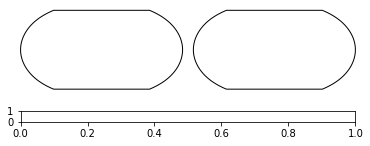

In [589]:
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
fig = plt.figure()
grid = AxesGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                label_mode='',
                 axes_class=(GeoAxes, {'map_projection': ccrs.EqualEarth()}))

In [596]:
grid.cbar_axes

In [590]:
grid[0]

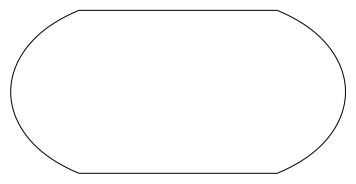

In [577]:
plt.axes(projection=ccrs.EqualEarth())

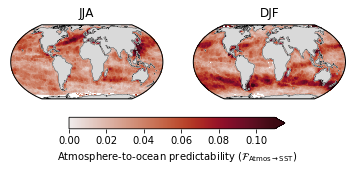

In [412]:
cmap = cmocean.cm.amp

ax = plt.subplot(1, 2, 1, projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_summer['F_atmos_to_sst'].copy()
var[data_summer['sig_atmos_to_sst'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.11
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

ax.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
            cmap=cmap, transform=ccrs.PlateCarree(),
            extend='max')
ax.set_title('JJA', pad=8)

ax = plt.subplot(1, 2, 2, projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_winter['F_atmos_to_sst'].copy()
var[data_winter['sig_atmos_to_sst'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.11
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

ax.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
            cmap=cmap, transform=ccrs.PlateCarree(),
            extend='max')
ax.set_title('DJF', pad=8)

fig = plt.gcf()
ax3 = fig.add_axes([0.26, 0.27, 0.5, 0.04])

cmap = cmocean.cm.amp
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.11)
cb1 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm,
                                       orientation='horizontal', extend='max')
cb1.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb1.locator = tick_locator
cb1.update_ticks()

plt.savefig('seasonal_atmos_to_sst.pdf')

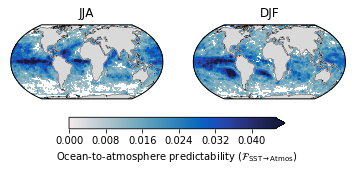

In [413]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

ax = plt.subplot(1, 2, 1, projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_summer['F_sst_to_atmos'].copy()
var[data_summer['sig_sst_to_atmos'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.045
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

ax.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
            cmap=cmap, transform=ccrs.PlateCarree(),
            extend='max')
ax.set_title('JJA', pad=8)

ax = plt.subplot(1, 2, 2, projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_winter['F_sst_to_atmos'].copy()
var[data_winter['sig_sst_to_atmos'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.045
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

ax.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
            cmap=cmap, transform=ccrs.PlateCarree(),
            extend='max')
ax.set_title('DJF', pad=8)

fig = plt.gcf()
ax3 = fig.add_axes([0.26, 0.27, 0.5, 0.04])

norm = matplotlib.colors.Normalize(vmin=0, vmax=0.045)
cb1 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm,
                                       orientation='horizontal', extend='max')
cb1.set_label(r'Ocean-to-atmosphere predictability ($\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Atmos}}$)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb1.locator = tick_locator
cb1.update_ticks()

plt.savefig('seasonal_sst_to_atmos.pdf')

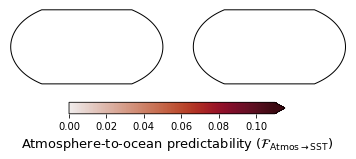

In [405]:
ax = plt.subplot(1, 2, 1, projection=ccrs.EqualEarth())
ax = plt.subplot(1, 2, 2, projection=ccrs.EqualEarth())

fig = plt.gcf()
ax3 = fig.add_axes([0.26, 0.27, 0.5, 0.04])

cmap = cmocean.cm.amp
norm = matplotlib.colors.Normalize(vmin=0, vmax=0.11)
cb1 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap, norm=norm,
                                       orientation='horizontal', extend='max')
cb1.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=7)
cb1.locator = tick_locator
cb1.update_ticks()

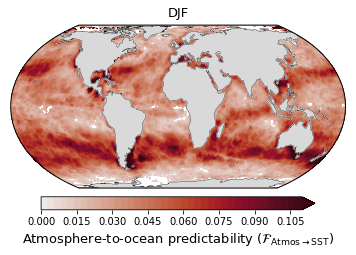

In [542]:
cmap = cmocean.cm.amp

#plt.figure()
plt.subplot(1, 2, 2)
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_winter['F_atmos_to_sst'].copy()
var[data_winter['sig_atmos_to_sst'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.11
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
plt.title('DJF', size=13, pad=8)
cb.set_label(r'Atmosphere-to-ocean predictability ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
#plt.savefig('F_atmos_to_sst_winter.pdf')

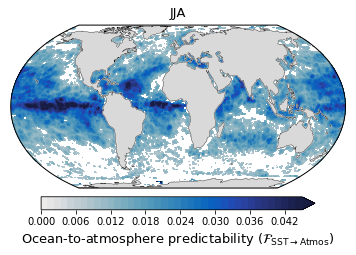

In [488]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_summer['F_sst_to_atmos']
var[data_summer['sig_sst_to_atmos'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.045
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
plt.title('JJA', size=13, pad=8)
cb.set_label(r'Ocean-to-atmosphere predictability ($\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Atmos}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_summer_sst_to_atmos.pdf')

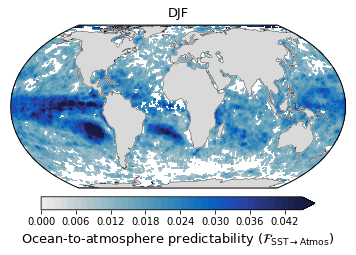

In [489]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_winter['F_sst_to_atmos']
var[data_winter['sig_sst_to_atmos'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.045
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
plt.title('DJF', size=13, pad=8)
cb.set_label(r'Ocean-to-atmosphere predictability ($\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Atmos}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_winter_sst_to_atmos.pdf')

In [ ]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data_winter['F_sst_to_atmos']
var[data_winter['sig_sst_to_atmos'] > 0.05] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = var.min(), 0.045
levels = numpy.linspace(0, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
plt.title('DJF', size=13, pad=8)
cb.set_label(r'Ocean-to-atmosphere predictability ($\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Atmos}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_winter_sst_to_atmos.pdf')

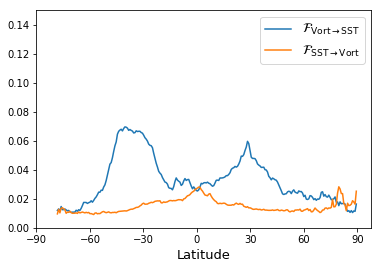

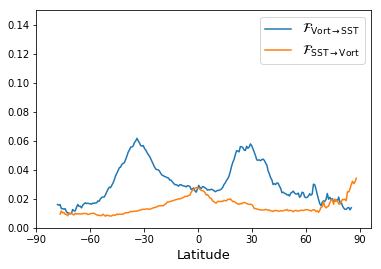

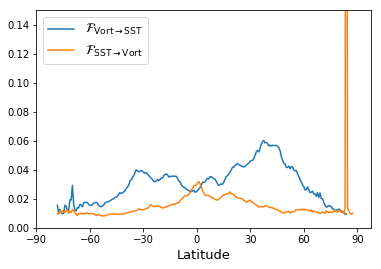

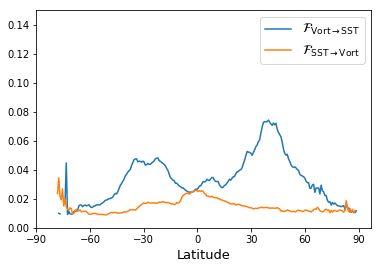

In [338]:
for season in [data_winter, data_spring, data_summer, data_fall]:
    pts = []
    pts2 = []

    atmos_to_sst = season['F_atmos_to_sst'].load()
    sst_to_atmos = season['F_sst_to_atmos'].load()

    for l in numpy.unique(lat):
        pts.append((atmos_to_sst[(season['sig_atmos_to_sst'] < 0.05) & (lat == l)]).median())
        pts2.append((sst_to_atmos[(season['sig_sst_to_atmos'] < 0.05) & (lat == l)]).median())
    plt.plot(numpy.unique(lat), pts)
    plt.plot(numpy.unique(lat), pts2)
    plt.ylim([0, 0.15])
    plt.xlabel('Latitude', size=13)
    plt.xticks(numpy.linspace(-90, 90, 7))
    plt.legend([r'$\mathcal{F}_{\mathrm{Vort}\rightarrow\mathrm{SST}}$', r'$\mathcal{F}_{\mathrm{SST}\rightarrow\mathrm{Vort}}$'], fontsize=13)
    plt.show()
    #plt.savefig('zonal_average.pdf')

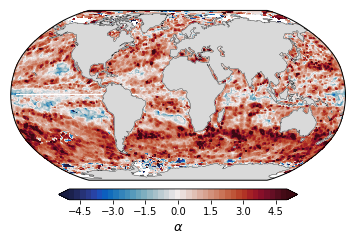

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(data_winter['F_vort_to_sst']/data_winter['F_sst_to_vort'])

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\alpha$', size=13)

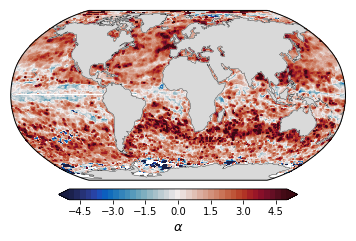

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

ratio = numpy.log(data_summer['F_vort_to_sst']/data_summer['F_sst_to_vort'])

var = numpy.ma.masked_invalid(ratio)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, levels=numpy.linspace(-5, 5, 40), cmap=cmocean.cm.balance,
             vmax=5, vmin=-5, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\alpha$', size=13)

In [78]:
data1['mspe_full_atmos_to_sst']

<xarray.DataArray 'mspe_full_atmos_to_sst' (cell: 88838, delay: 121)>
[10749398 values with dtype=float64]
Coordinates:
  * cell     (cell) int64 1 2 3 4 5 6 7 ... 88833 88834 88835 88836 88837 88838
  * delay    (delay) int64 0 1 2 3 4 5 6 7 8 ... 113 114 115 116 117 118 119 120

In [3]:
import xarray

In [35]:
spectral = xarray.open_dataset('data_atmos/spectral.nc')

In [5]:
freqs = numpy.linspace(0, 0.5, 301)

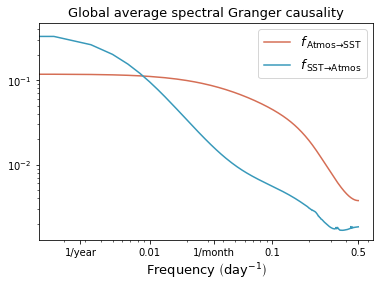

In [161]:
freqs = numpy.linspace(0, 0.5, 301)

plt.plot(freqs, numpy.nanmean(spectral['f_atmos_to_sst'], axis=0), '#D56E55')
plt.plot(freqs, numpy.nanmean(spectral['f_sst_to_atmos'], axis=0), '#3899BA')

plt.legend([r'$f_{\,\mathrm{Atmos}\to\mathrm{SST}}$', r'$f_{\,\mathrm{SST}\to\mathrm{Atmos}}$'], fontsize=13)
#plt.ylim(bottom=0)
plt.title(r'Global average spectral Granger causality', size=13)
plt.xlabel(r'Frequency $\left(\mathrm{day}^{-1}\right)$', size=13)
ax = plt.gca()
#ax.ticklabel_format(style='plain')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([1/2, 1/10, 1/30, 1/100, 1/365])
ax.set_xticklabels(['0.5', '0.1', '1/month', '0.01', '1/year'])
plt.savefig('spectral_atmos.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


(0, 0.15)

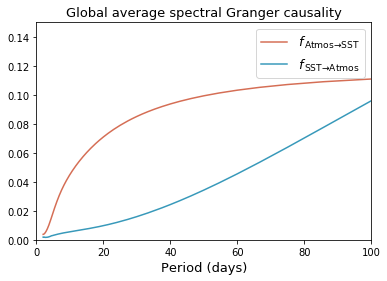

In [473]:
freqs = numpy.linspace(0, 0.5, 301)

plt.plot(1/freqs, numpy.nanmean(spectral['f_atmos_to_sst'], axis=0), '#D56E55')
plt.plot(1/freqs, numpy.nanmean(spectral['f_sst_to_atmos'], axis=0), '#3899BA')

plt.legend([r'$f_{\,\mathrm{Atmos}\to\mathrm{SST}}$', r'$f_{\,\mathrm{SST}\to\mathrm{Atmos}}$'], fontsize=13)
#plt.ylim(bottom=0)
plt.title(r'Global average spectral Granger causality', size=13)
plt.xlabel(r'Period (days)', size=13)
ax = plt.gca()
#ax.ticklabel_format(style='plain')
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xticks([1/2, 1/10, 1/30, 1/100, 1/365])
#ax.set_xticklabels(['0.5', '0.1', '1/month', '0.01', '1/year'])
ax.set_xlim([0, 100])
ax.set_ylim([0, 0.15])
#plt.savefig('spectral_atmos_period.pdf')

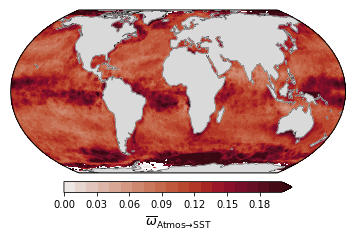

In [110]:
#dat = freqs[numpy.argmax(f_atmos_to_sst, axis=1)]
dat = wmean.data

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

dat[(data1['sig_atmos_to_sst'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(dat)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

vmin, vmax = numpy.nanmin(dat), 0.2
levels = numpy.linspace(vmin, vmax, 20)

plt.contourf(lon_cyc, lat2, regridded, levels=levels, cmap=cmocean.cm.amp,
             extend='max', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\overline{\omega}_{\mathrm{Atmos}\to\mathrm{SST}}$', size=13)
plt.savefig('freq_atmos_to_sst.pdf')

In [115]:
dat = wmean2.data
dat[(data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
numpy.nanmean(dat[dat > 0])

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


0.07337554360030445

In [113]:
wmean

<xarray.DataArray 'f_atmos_to_sst' (cell: 88838)>
array([0.178774, 0.179445, 0.164826, ..., 0.      , 0.      , 0.      ])
Coordinates:
  * cell     (cell) int64 1 2 3 4 5 6 7 ... 88833 88834 88835 88836 88837 88838

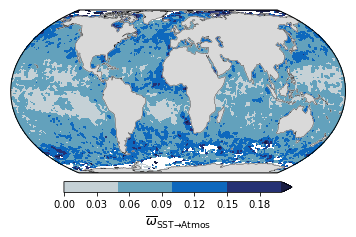

In [257]:
#dat = freqs[numpy.argmax(f_atmos_to_sst, axis=1)]
dat = wmean2.data

upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, zorder=1)
ax.set_global()

dat[(data1['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(dat)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

vmin, vmax = numpy.nanmin(dat), 0.2
levels = numpy.linspace(vmin, vmax, 5)

plt.contourf(lon_cyc, lat2, regridded, levels=levels, cmap=cmap,
             extend='max', transform=ccrs.PlateCarree())
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04)
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(r'$\overline{\omega}_{\mathrm{SST}\to\mathrm{Atmos}}$', size=13)
#plt.savefig('freq_sst_to_atmos.pdf')

([<matplotlib.axis.XTick at 0x7f95095e9a58>,
 <a list of 7 Text xticklabel objects>)

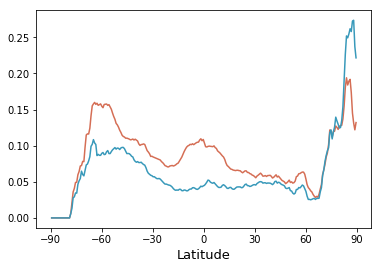

In [89]:
pts = []
pts2 = []
atmos_to_sst = wmean.load()
sst_to_atmos = wmean2.load()

for l in numpy.unique(lat):
    pts.append(numpy.nanmean(atmos_to_sst[(lat == l)]))
    pts2.append(numpy.nanmean(sst_to_atmos[(lat == l)]))
plt.plot(numpy.unique(lat), pts, '#D56E55')
plt.plot(numpy.unique(lat), pts2, '#3899BA')
plt.xlabel('Latitude', size=13)
plt.xticks(numpy.linspace(-90, 90, 7))
#plt.ylim([0, 0.061])
#plt.legend([r'$\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$', r'$\mathcal{F}_{\mathrm{SST}\rightarrow \mathrm{Atmos}}$'], fontsize=13)

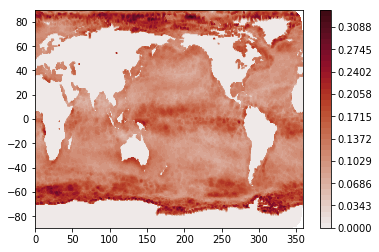

In [11]:
#f_atmos_to_sst = spectral['f_atmos_to_sst'].data
#f_atmos_to_sst[numpy.isnan(f_atmos_to_sst)] = 0
dat = wmean.data
dat[numpy.isnan(dat)] = 0
#dat = numpy.nanmean(f_atmos_to_sst[:, 40:], axis=1)

cmap = cmocean.cm.amp
vmin, vmax = numpy.nanmin(dat), numpy.nanmax(dat)
levels = numpy.linspace(vmin, vmax, 40)

plt.tricontourf(lon, lat, dat, levels=levels, cmap=cmap, vmax=vmax, vmin=vmin)
plt.colorbar()

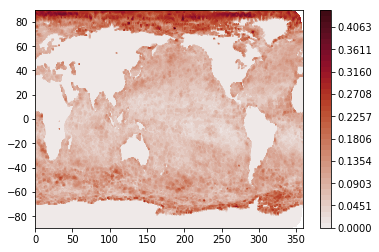

In [16]:
#f_atmos_to_sst = spectral['f_atmos_to_sst'].data
#f_atmos_to_sst[numpy.isnan(f_atmos_to_sst)] = 0
dat = wmean2.data
dat[numpy.isnan(dat)] = 0
#dat = numpy.nanmean(f_atmos_to_sst[:, 40:], axis=1)

cmap = cmocean.cm.amp
vmin, vmax = numpy.nanmin(dat), numpy.nanmax(dat)
levels = numpy.linspace(vmin, vmax, 40)

plt.tricontourf(lon, lat, dat, levels=levels, cmap=cmap, vmax=vmax, vmin=vmin)
plt.colorbar()

In [42]:
numpy.nanmean(wmean)

0.11873557411372376

In [36]:
(numpy.nanmean(spectral['f_atmos_to_sst'], axis=0)*freqs).sum()/numpy.nanmean(spectral['f_atmos_to_sst'], axis=0).sum()

0.11122124883904662

In [37]:
(numpy.nanmean(spectral['f_sst_to_atmos'], axis=0)*freqs).sum()/numpy.nanmean(spectral['f_sst_to_atmos'], axis=0).sum()

0.06445595296141368

In [27]:
wmean2[wmean2 > 0].mean()

<xarray.DataArray 'f_sst_to_atmos' ()>
array(0.077896)

In [46]:
import scipy.integrate

In [56]:
numpy.nanmean(numpy.trapz(freqs*spectral['f_atmos_to_sst'], x=freqs, axis=1)/numpy.trapz(spectral['f_atmos_to_sst'], x=freqs, axis=1))

0.11950096252942038

In [57]:
numpy.nanmean(numpy.trapz(freqs*spectral['f_sst_to_atmos'], x=freqs, axis=1)/numpy.trapz(spectral['f_sst_to_atmos'], x=freqs, axis=1))

0.08196062341271977

In [39]:
wmean = (spectral['f_atmos_to_sst']*freqs).sum(axis=1)/numpy.sum(spectral['f_atmos_to_sst'], axis=1)

In [40]:
wmean2 = (spectral['f_sst_to_atmos']*freqs).sum(axis=1)/numpy.sum(spectral['f_sst_to_atmos'], axis=1)

In [640]:
numpy.nanmean(data15['mspe_reduced_sst_to_atmos'][:, 0])

2.361592781553473e-23

In [641]:
numpy.nanmean(data1['mspe_reduced_sst_to_atmos'][:, 0])

1.0096550478845793e-20

In [644]:
numpy.nanmean(data15['mspe_reduced_atmos_to_sst'][:, 0]), numpy.nanmean(data15['mspe_full_atmos_to_sst'][:, 0])

(0.14204050219374306, 0.13249718438058275)

In [645]:
numpy.nanmean(data1['mspe_reduced_atmos_to_sst'][:, 0]), numpy.nanmean(data1['mspe_full_atmos_to_sst'][:, 0]), 

(0.022246314950247915, 0.021648263995134243)

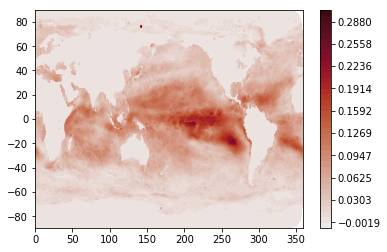

In [636]:
f_atmos_to_sst = spectral['f_sst_to_atmos'].data
f_atmos_to_sst[numpy.isnan(f_atmos_to_sst)] = 0
#dat = freqs[numpy.argmax(f_atmos_to_sst, axis=1)]
dat = numpy.nanmean(f_atmos_to_sst[:, :40], axis=1)

cmap = cmocean.cm.amp
vmin, vmax = numpy.nanmin(dat), numpy.nanmax(dat)
levels = numpy.linspace(vmin, vmax, 40)

plt.tricontourf(lon, lat, dat, levels=levels, cmap=cmap, vmax=vmax, vmin=vmin)
plt.colorbar()

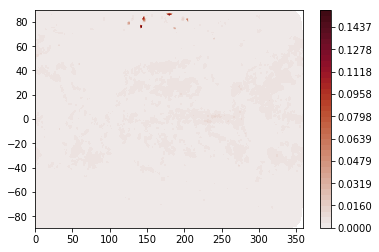

In [637]:
f_atmos_to_sst = spectral['f_sst_to_atmos'].data
f_atmos_to_sst[numpy.isnan(f_atmos_to_sst)] = 0
#dat = freqs[numpy.argmax(f_atmos_to_sst, axis=1)]
dat = numpy.nanmean(f_atmos_to_sst[:, 40:], axis=1)

cmap = cmocean.cm.amp
vmin, vmax = numpy.nanmin(dat), numpy.nanmax(dat)
levels = numpy.linspace(vmin, vmax, 40)

plt.tricontourf(lon, lat, dat, levels=levels, cmap=cmap, vmax=vmax, vmin=vmin)
plt.colorbar()

In [621]:
numpy.nanargmax(spectral['f_atmos_to_sst'], axis=1)

ValueError: All-NaN slice encountered

In [491]:
a2s = numpy.nanmean(spectral['f_atmos_to_sst'], axis=0)

In [512]:
s2a = numpy.nanmean(spectral['f_sst_to_atmos'], axis=0)

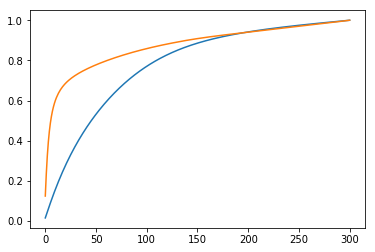

In [516]:
plt.plot(numpy.cumsum(a2s)/sum(a2s))
plt.plot(numpy.cumsum(s2a)/sum(s2a))

In [530]:
1/freqs[numpy.argmin(abs(numpy.cumsum(a2s)/sum(a2s) - 0.5))]

13.333333333333332

In [ ]:
1/freqs[numpy.argmin(abs(numpy.cumsum(a2s)/sum(a2s) - 0.5))]

In [531]:
1/freqs[numpy.argmin(abs(numpy.cumsum(s2a)/sum(s2a) - 0.5))]

120.0

In [522]:
numpy.argsort(a2s)[len(a2s)//2]

150

In [430]:
data_summer.close()

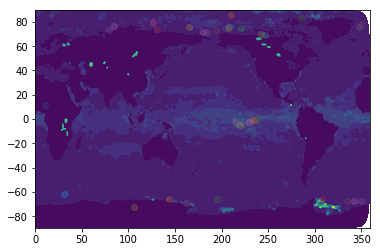

In [535]:
plt.tricontourf(lon, lat, times, 20)
for l in left:
    plt.scatter(lon[l:l+1], lat[l:l+1], alpha=0.2)
#plt.colorbar()

In [352]:
left[100]

5221

In [302]:
times = data1['times'][:, 0].load()
times[numpy.isnan(times)] = 0

In [533]:
left = list(map(lambda x: int(x.split()[0]), open('left_last').read().split('\n')[:-1]))

In [364]:
numpy.nanmean(1 - data1['mspe_full_sst_to_atmos'][:, 0]/var_atmos)

0.9301906454916106

In [362]:
numpy.nanmean(1 - data1['mspe_full_atmos_to_sst'][:, 0]/var_sst)

0.9381765656197508

In [417]:
numpy.nanmean(reduced_winter)

0.022216707571226468

In [416]:
numpy.nanmean(reduced_summer)

0.025097253424944094

In [392]:
numpy.nanmean(data1['mspe_reduced_atmos_to_sst'][:, 0])

0.022246314950247915

In [395]:
numpy.nanmean(data_summer['mspe_reduced_atmos_to_sst']).mean()

0.01626642305714322

In [356]:
var_atmos = numpy.load('var_atmos.npy')

In [358]:
var_sst = numpy.load('var_sst.npy')

In [359]:
var_sst

array([0.00251026, 0.00298295, 0.00386708, ..., 0.        , 0.        ,
       0.        ])

In [646]:
# Summer hemisphere
mspe_sst = numpy.hstack([reduced_summer[lat > 0], reduced_winter[lat < 0]])
numpy.sqrt(numpy.nanmean(mspe_sst))

0.17250884912218334

In [647]:
# Winter hemisphere
mspe_sst = numpy.hstack([reduced_winter[lat > 0], reduced_summer[lat < 0]])
numpy.sqrt(numpy.nanmean(mspe_sst))

0.13230344205888245

In [398]:
data_winter['mspe_reduced_atmos_to_sst']

<xarray.DataArray 'mspe_reduced_atmos_to_sst' (cell: 88838)>
array([3.263429e-08, 3.263429e-08, 3.263429e-08, ...,          nan,
                nan,          nan])
Coordinates:
  * cell     (cell) int64 1 2 3 4 5 6 7 ... 88833 88834 88835 88836 88837 88838

In [399]:
data_winter['mspe_full_atmos_to_sst']

<xarray.DataArray 'mspe_full_atmos_to_sst' (cell: 88838)>
array([3.201261e-08, 3.234569e-08, 3.418501e-08, ...,          nan,
                nan,          nan])
Coordinates:
  * cell     (cell) int64 1 2 3 4 5 6 7 ... 88833 88834 88835 88836 88837 88838

In [408]:
reduced_winter = numpy.exp(data_winter['F_atmos_to_sst'])*data_winter['mspe_full_atmos_to_sst']

In [406]:
reduced_summer = numpy.exp(data_summer['F_atmos_to_sst'])*data_summer['mspe_full_atmos_to_sst']

In [413]:
(0.03+0.016)/2

0.023

In [410]:
numpy.nanmean(reduced_summer)

0.025097253424944094

In [419]:
numpy.nanmean(reduced_winter - data_winter['mspe_reduced_atmos_to_sst'])

0.004158610115400555

In [420]:
numpy.nanmean(numpy.exp(data1['F_atmos_to_sst'][:, 0])*data1['mspe_full_atmos_to_sst'][:, 0] - data1['mspe_reduced_atmos_to_sst'][:, 0])

2.3567932073708e-20

In [648]:
numpy.sqrt(1e-20)

1e-10

In [ ]:
import hdfsto

In [117]:
thf = numpy.fromfile('thfah_daily365_1979-2017.dat', dtype='f8').reshape([14234, 88838])

In [125]:
monthly = thf[14:, :].reshape([474, -1, 88838]).mean(axis=1)

In [132]:
var = numpy.var(monthly, axis=0)

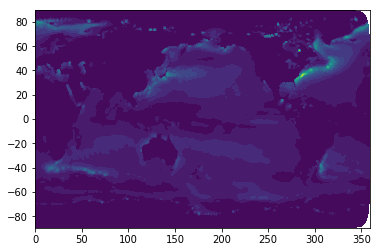

In [135]:
plt.tricontourf(lon, lat, var, 20)

In [134]:
var

array([1.43807806e+10, 1.61840923e+10, 1.66470988e+10, ...,
       9.43912299e+09, 9.15093853e+09, 9.05378360e+09])

In [170]:
numpy.nanmean(data15['F_atmos_to_sst'][:, 0])/numpy.nanmean(data15['F_sst_to_atmos'][:, 0])

1.7490624320410562

In [171]:
numpy.nanmean(data1['F_sst_to_atmos'][:, 0])

2.785015495818795

In [174]:
numpy.nanmean(data1['F_sst_to_atmos'][:, 0][data1['sig_sst_to_atmos'][:, 0] < 0.05])

0.009718331888957937

In [180]:
numpy.nanmean(data15['F_sst_to_atmos'][:, 0][(lat > 30) | (lat < -30)]), numpy.nanmean(data15['F_sst_to_atmos'][:, 0])

(0.02039646157954711, 0.04052082663632975)

In [181]:
numpy.nanmean(data1['F_sst_to_atmos'][:, 0][(lat > 30) | (lat < -30)]), numpy.nanmean(data1['F_sst_to_atmos'][:, 0])

(0.00534801505168451, 0.00922928004659083)

In [193]:
numpy.sqrt(numpy.nanmean(data1['mspe_reduced_sst_to_atmos'][:, 15])), numpy.sqrt(numpy.nanmean(data15['mspe_reduced_sst_to_atmos'][:, 1]))

(1.0044975293552867e-10, 4.8372319115889986e-12)

In [192]:
numpy.sqrt(numpy.nanmean(data1['mspe_full_sst_to_atmos'][:, 15])), numpy.sqrt(numpy.nanmean(data15['mspe_full_sst_to_atmos'][:, 1]))

(1.0033152717446267e-10, 4.7945329398999566e-12)

In [189]:
1.0048159273641015e-10/1.0020215889372354e-10

1.0027887008201388

In [190]:
4.859622188558976e-12/4.81225110585938e-12

1.0098438509665293

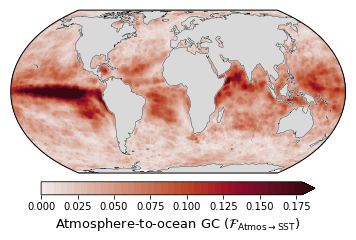

In [219]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = data15['F_sst_to_atmos'][:, 0]
#var[(data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean GC ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

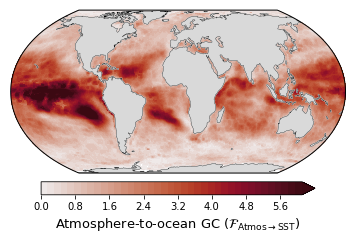

In [327]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = numpy.trapz(spectral['f_sst_to_atmos'][:, :18], axis=1)
#var[(data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean GC ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

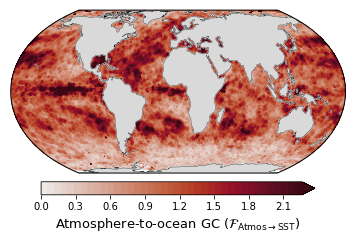

In [328]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = numpy.trapz(spectral['f_sst_to_atmos'][:, 18:], axis=1)
#var[(data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean GC ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

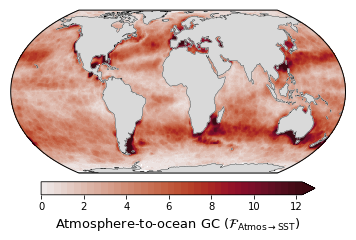

In [337]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = numpy.trapz(spectral['f_atmos_to_sst'][:, 50:], axis=1)
#var[(data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean GC ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

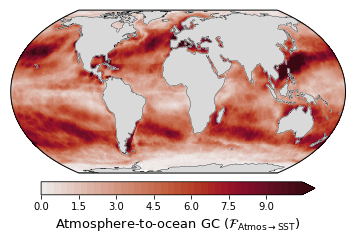

In [336]:
cmap = cmocean.cm.amp

plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cfeature.LAND, color='#D9D9D9', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)
ax.set_global()

var = numpy.trapz(spectral['f_atmos_to_sst'][:, :50], axis=1)
#var[(data15['sig_sst_to_atmos'][:, 0] > 0.05)] = numpy.NaN
var = numpy.ma.masked_invalid(var)
vmin, vmax = 0, numpy.nanpercentile(var.data, 99)
levels = numpy.linspace(vmin, vmax, 40)

regridded = pyresample.kd_tree.resample_nearest(orig_def, var.flatten(), targ_def, radius_of_influence=500000,
                                                fill_value=None).reshape([241, 480])

regridded, lon_cyc = add_cyclic_point(regridded, coord=lon2)

plt.contourf(lon_cyc, lat2, regridded, 100, levels=levels,
             cmap=cmap, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'Atmosphere-to-ocean GC ($\mathcal{F}_{\mathrm{Atmos}\rightarrow\mathrm{SST}}$)', size=13)
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()

In [335]:
1/freqs[50]

11.999999999999998

In [224]:
1/wmean2[(lat < 30) & (lat > -30)].mean()

<xarray.DataArray 'f_sst_to_atmos' ()>
array(22.655777)

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


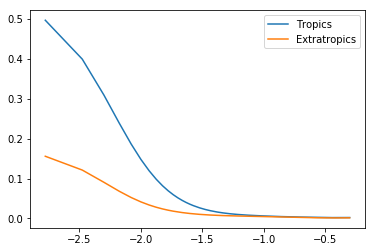

In [235]:
plt.plot(numpy.log10(freqs), (spectral['f_sst_to_atmos'][(lat < 30) & (lat > -30)].mean(axis=0)))
plt.plot(numpy.log10(freqs), (spectral['f_sst_to_atmos'][(lat > 30) | (lat < -30)].mean(axis=0)))
plt.legend(['Tropics', 'Extratropics'])

In [246]:
fsa = spectral['f_sst_to_atmos'].mean(axis=0)

In [295]:
fas = spectral['f_atmos_to_sst'].mean(axis=0)

In [254]:
[numpy.argmin(abs(numpy.cumsum(fsa)/sum(fsa) - 0.67))]

[<xarray.DataArray 'f_sst_to_atmos' ()>
 array(17)]

In [252]:
(numpy.cumsum(fsa)/sum(fsa))[2]

<xarray.DataArray 'f_sst_to_atmos' ()>
array(0.32532)
Coordinates:
    freq     int64 2

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


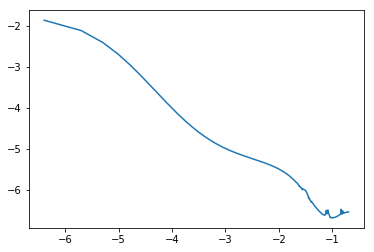

In [228]:
plt.plot(numpy.log(freqs), numpy.log(spectral['f_sst_to_atmos'][(lat > 30) | (lat < -30)].mean(axis=0)))

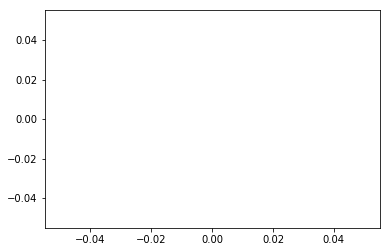

In [272]:
plt.plot(scipy.integrate.cumtrapz(fsa/freqs, freqs) - scipy.integrate.cumtrapz(fsa[::-1]/(0.5 - freqs[::-1]), freqs[::-1]))

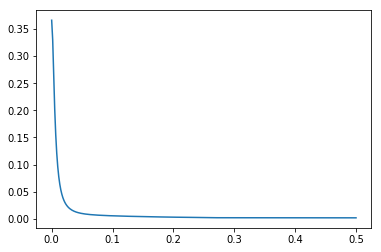

In [273]:
plt.plot(freqs[::-1], fsa[::-1])

In [276]:
scipy.integrate.cumtrapz(fsa[::-1]/(0.5 - freqs[::-1]), freqs[::-1])

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -i

In [311]:
scipy.interpolate.UnivariateSpline?

Init signature: scipy.interpolate.UnivariateSpline(x, y, w=None, bbox=[None, None], k=3, s=None, ext=0, check_finite=False)
Docstring:     
One-dimensional smoothing spline fit to a given set of data points.

Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
specifies the number of knots by specifying a smoothing condition.

Parameters
----------
x : (N,) array_like
    1-D array of independent input data. Must be increasing.
y : (N,) array_like
    1-D array of dependent input data, of the same length as `x`.
w : (N,) array_like, optional
    Weights for spline fitting.  Must be positive.  If None (default),
    weights are all equal.
bbox : (2,) array_like, optional
    2-sequence specifying the boundary of the approximation interval. If
    None (default), ``bbox=[x[0], x[-1]]``.
k : int, optional
    Degree of the smoothing spline.  Must be <= 5.
    Default is k=3, a cubic spline.
s : float or None, optional
    Positive smoothing factor used to choose the

In [314]:
spline = scipy.interpolate.UnivariateSpline(freqs, fsa)

In [315]:
spline2 = scipy.interpolate.UnivariateSpline(freqs, fas)

In [322]:
f = lambda w0, w1: spline.integral(w0, w1)/(w1 - w0)

In [308]:
f2 = lambda x: spline2.integral(0, x)/x - spline2.integral(x, 0.5)/(0.5 - x)

In [313]:
spline.integral(0, freqs)

0.0

In [323]:
f(0, 1/30), f(1/90, 1/14), f(1/14, 0.5)

(0.09055648093173242, 0.05281859704259393, 0.001535458723132514)

In [341]:
numpy.exp(f(0, 1/100))

1.095542370876621

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


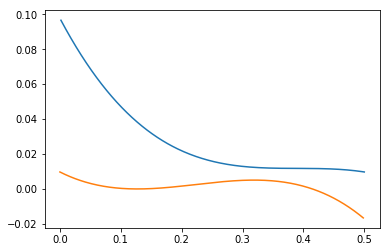

In [316]:
plt.plot(freqs, [spline.integral(0, x)/x for x in freqs])
plt.plot(freqs, [spline.integral(x, 0.5)/(0.5 - x) for x in freqs])

In [318]:
log = numpy.log

In [266]:
scipy.integrate.cumtrapz?

Signature: scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)
Docstring:
Cumulatively integrate y(x) using the composite trapezoidal rule.

Parameters
----------
y : array_like
    Values to integrate.
x : array_like, optional
    The coordinate to integrate along.  If None (default), use spacing `dx`
    between consecutive elements in `y`.
dx : float, optional
    Spacing between elements of `y`.  Only used if `x` is None.
axis : int, optional
    Specifies the axis to cumulate.  Default is -1 (last axis).
initial : scalar, optional
    If given, insert this value at the beginning of the returned result.
    Typically this value should be 0.  Default is None, which means no
    value at ``x[0]`` is returned and `res` has one element less than `y`
    along the axis of integration.

Returns
-------
res : ndarray
    The result of cumulative integration of `y` along `axis`.
    If `initial` is None, the shape is such that the axis of integration
    has one less value t

In [325]:
1/freqs

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([         inf, 600.        , 300.        , 200.        ,
       150.        , 120.        , 100.        ,  85.71428571,
        75.        ,  66.66666667,  60.        ,  54.54545455,
        50.        ,  46.15384615,  42.85714286,  40.        ,
        37.5       ,  35.29411765,  33.33333333,  31.57894737,
        30.        ,  28.57142857,  27.27272727,  26.08695652,
        25.        ,  24.        ,  23.07692308,  22.22222222,
        21.42857143,  20.68965517,  20.        ,  19.35483871,
        18.75      ,  18.18181818,  17.64705882,  17.14285714,
        16.66666667,  16.21621622,  15.78947368,  15.38461538,
        15.        ,  14.63414634,  14.28571429,  13.95348837,
        13.63636364,  13.33333333,  13.04347826,  12.76595745,
        12.5       ,  12.24489796,  12.        ,  11.76470588,
        11.53846154,  11.32075472,  11.11111111,  10.90909091,
        10.71428571,  10.52631579,  10.34482759,  10.16949153,
        10.        ,   9.83606557,   9.67741935,   9.52